In [1]:
import matplotlib as mpl
from matplotset import generate_shape
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import numpy as np

In [2]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams["font.size"] = 16

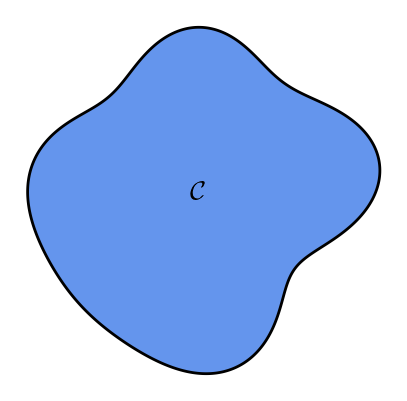

In [3]:
cart_xs, cart_ys = generate_shape(3, scale=0.1, x_offset=0.0, y_offset=0.0, seed=10)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.fill(cart_xs, cart_ys, facecolor="cornflowerblue", edgecolor="black", linewidth=2)
ax.text(0.0, 0.0, r"$\mathcal{C}$", fontsize=20)

ax.axis("off")
ax.set_aspect("equal")

plt.savefig("imgs/single_demo.png", dpi=200, transparent=True, bbox_inches="tight")
plt.show()

In [3]:
x_offset, y_offset = -1.0, -0.6

cart_xs, cart_ys = generate_shape(3, scale=0.1, x_offset=x_offset, y_offset=y_offset, seed=10)
_cart_xs, _cart_ys = generate_shape(5, scale=0.1, seed=5)

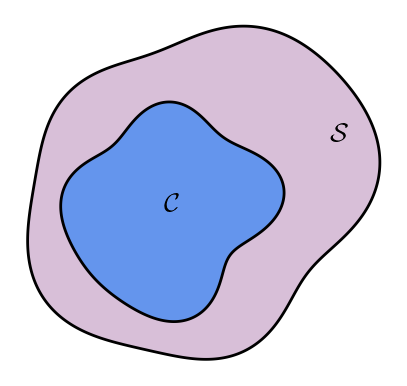

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.fill(_cart_xs, _cart_ys, facecolor="thistle", edgecolor="black", linewidth=2)
ax.fill(cart_xs, cart_ys, facecolor="cornflowerblue", edgecolor="black", linewidth=2)

ax.text(x_offset, y_offset, r"$\mathcal{C}$", fontsize=20)
ax.text(4.0, 1.5, r"$\mathcal{S}$", fontsize=20)

ax.axis("off")
ax.set_aspect("equal")

plt.savefig("imgs/demo.png", dpi=200, transparent=True, bbox_inches="tight")
plt.show()

In [5]:
# get solid shape
cart_xs, cart_ys, rhos, phis = generate_shape(3, scale=0.1, x_offset=x_offset, y_offset=y_offset, seed=10, return_polar=True)

# get dashed shape
_cart_xs, _cart_ys, _rhos, _phis = generate_shape(3, scale=0.1, x_offset=x_offset, y_offset=y_offset, seed=400, return_polar=True)

# compute their intersection boundary by doing an element-wise minimum on their polar r coordinate 
min_idx = np.argmin(np.vstack((rhos[np.newaxis, :], _rhos[np.newaxis, :])), axis=0)
xs = np.vstack((cart_xs[np.newaxis, :], _cart_xs[np.newaxis, :]))[min_idx, np.arange(1000)]
ys = np.vstack((cart_ys[np.newaxis, :], _cart_ys[np.newaxis, :]))[min_idx, np.arange(1000)]

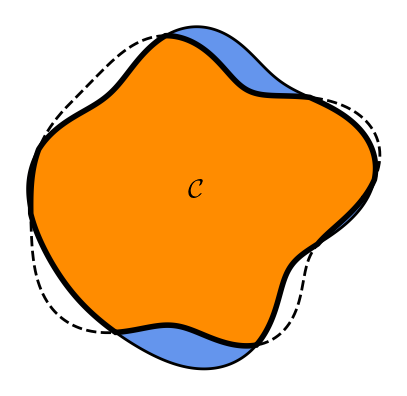

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.fill(cart_xs, cart_ys, facecolor="cornflowerblue", edgecolor="black", linewidth=2)
ax.plot(_cart_xs, _cart_ys, color="black", linewidth=2, linestyle="dashed")
ax.fill(xs, ys, facecolor="darkorange", edgecolor="black", linewidth=4)
ax.text(x_offset, y_offset, r"$\mathcal{C}$", fontsize=20)

ax.axis("off")
ax.set_aspect("equal")

plt.savefig("imgs/demo_intersect_shapes.png", dpi=200, transparent=False, bbox_inches="tight")
plt.show()

In [7]:
def ellipse_polar(theta, a=5, b=1):
    rs = (a * b) / (np.sqrt(b * b * np.cos(theta) * np.cos(theta)  + a * a * np.sin(theta) * np.sin(theta)))
    xs = rs * np.cos(theta)
    ys = rs * np.sin(theta)
    
    return rs, xs, ys

In [8]:
# get the blue shape
cart_xs, cart_ys, rhos, phis = generate_shape(3, scale=0.1, seed=10, nums=10000, return_polar=True)

# get the ellipse
thetas = np.linspace(0.0, 2*np.pi, 10000)
rs, _cart_xs, _cart_ys = ellipse_polar(thetas)

# compute the boundary of their intersection
min_idx = np.argmin(np.vstack((rhos[np.newaxis, :], rs[np.newaxis, :])), axis=0)
xs = np.vstack((cart_xs[np.newaxis, :], _cart_xs[np.newaxis, :]))[min_idx, np.arange(10000)]
ys = np.vstack((cart_ys[np.newaxis, :], _cart_ys[np.newaxis, :]))[min_idx, np.arange(10000)]

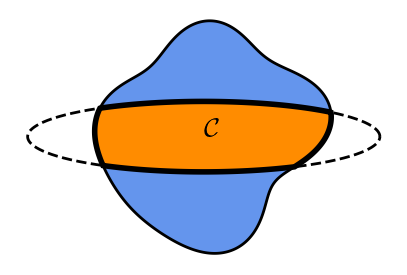

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.fill(cart_xs, cart_ys, facecolor="cornflowerblue", edgecolor="black", linewidth=2)
ax.plot(_cart_xs, _cart_ys, color="black", linewidth=2, linestyle="dashed")
ax.fill(xs, ys, facecolor="darkorange", edgecolor="black", linewidth=4)
ax.text(0, 0, r"$\mathcal{C}$", fontsize=20)

ax.axis("off")
ax.set_aspect("equal")

plt.savefig("imgs/demo_intersect_ellipse.png", dpi=200, transparent=False, bbox_inches="tight")
plt.show()

In [10]:
# get transform that rotates 45 deg
transform = Affine2D().rotate(np.pi/4)

# apply transform to the shapes
coords = transform.transform(np.vstack((cart_xs[np.newaxis, :], cart_ys[np.newaxis, :])).T)
_coords = transform.transform(np.vstack((_cart_xs[np.newaxis, :], _cart_ys[np.newaxis, :])).T)
intersection = transform.transform(np.vstack((xs[np.newaxis, :], ys[np.newaxis, :])).T)

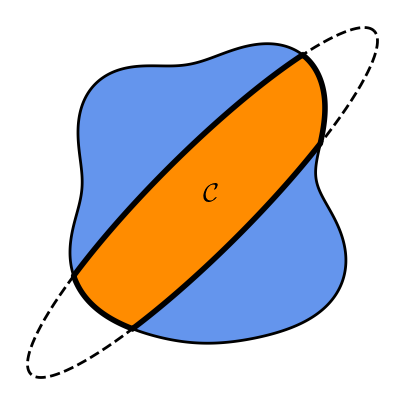

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.fill(coords[:, 0], coords[:, 1], facecolor="cornflowerblue", edgecolor="black", linewidth=2)
ax.plot(_coords[:, 0], _coords[:, 1], color="black", linewidth=2, linestyle="dashed")
ax.fill(intersection[:, 0], intersection[:, 1], facecolor="darkorange", edgecolor="black", linewidth=4)
ax.text(0, 0, r"$\mathcal{C}$", fontsize=20)

ax.axis("off")
ax.set_aspect("equal")

plt.savefig("imgs/demo_intersect_rotate.png", dpi=200, transparent=False, bbox_inches="tight")
plt.show()